#### Explain 


when we draw a classification boundary for these two groups we'll notice that there is many possible ways of drawing this  boundary all these  boundaries are valid 

![](./images/svm.png)<br/>

so how we decide which boundary is the best  for my classification problem ? one way of looking at it is take nearby data points  and you can measure the distance from that line to  data point 
the distance between data point and the line is called **Margin**  
so which one is best  the line with lower or the one with higher margin ?? if we think carefully we'll realize that the line with a  higher margin is better  because is classifies  these two groups in a better way   

![Alt text](./images/svm1.png)

and **that what SVM tries to do**  is try to maximize  margin between nearby data point  and the line it self.  and these nearby data points called **Support Vectors**

---
so in case of 2dimensional space the boundary is a line  in case of 3d the boundary is plane but in ndimensional space mathematically  the boundary is  hyperPlane : plane in n dimensional space and each dimension tries  to separate out different classification group and that's **what support Vector machine  algorithm tries to do which is draws hyper plane in n dimensional space such that it maximize margin between classification groups**  

---

**Gamma & Regularization**


1. ***Gamma***  

![Alt text](./images/svm2.png)<br/>

on above graph  we can see that  this decision boundary is only  considering the data points which are very  near to it so we can see that we have excluded these  far data points in making the decision for the decision boundary and this one approach known as HighGama <br/>


another approach is that we can consider the far away data points as well and this approach called LowGamma<br/>
![Alt text](./images/svm3.png)<br/>

both the approaches are valid it's just that with low  gamma sometimes we might get  problems with accuracy but it can be more efficiently computationally so both are valid but it depends on your individual situation . 

<br/>

---

2. ***Regularization*** 

![Alt text](./images/svm4.png)

<br/>
in graph above there is a seperate dataset where we tried to draw our boundary very carefully to avoid  any classification  error but this is **almost Overfitting the model** 



on the other  hand   i can take some errors  so my line look smoother <br/>
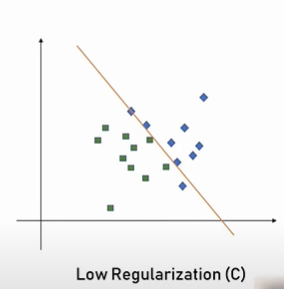





**Kernel**
<!-- eksik sonra yaz -->

### Support Vector Machine 


In [1]:
from sklearn.datasets import load_iris

iris = load_iris()


dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
## create pandas data frame for better visualizing 

import pandas as pd 
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# added the name of the flowers and target value
df["target"]= iris.target
df["flower_name"] = df["target"].apply(lambda x : iris.target_names[x]) # when try to generate a column from another column in pandas we use apply function 


In [4]:
df.loc[50]

sepal length (cm)           7.0
sepal width (cm)            3.2
petal length (cm)           4.7
petal width (cm)            1.4
target                        1
flower_name          versicolor
Name: 50, dtype: object

In [5]:
# df0 = df["flower_name"]=="setosa"
# df2 = df["flower_name"]=="virginica"
# df1 = df["flower_name"]=="versicolor" 
# in this way it is gonna give us just true or false not giving us data frames 
df0 = df[df["flower_name"]=="setosa"]
df1 = df[df["flower_name"]=="versicolor"]
df2 = df[df["flower_name"]=="virginica"]

In [6]:
df0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


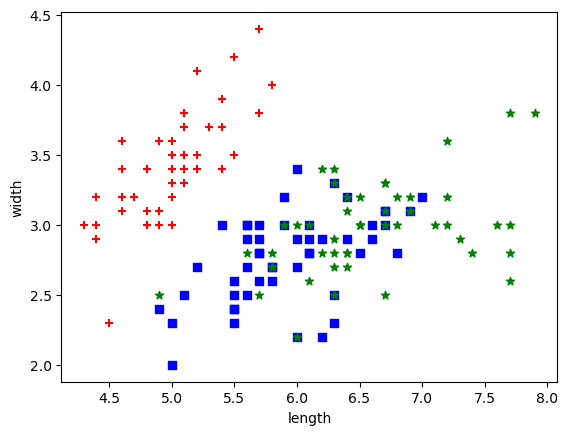

In [7]:
import matplotlib.pyplot as plt 

%matplotlib inline 
plt.xlabel("length")
plt.ylabel('width') 

plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"], color="red",marker= "+")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"], color="blue",marker= ",")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"], color="green",marker= "*")

In [8]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split


X = df.drop(["target","flower_name"], axis=1)
y = df.target



X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [9]:
model  = SVC() ## gamma and regularization and kernel can be edit 
model.fit(X_train,y_train)

SVC()

In [10]:
model.score(X_test,y_test)

0.9666666666666667